In [222]:
import tweepy 
import sys
import pandas as pd
import matplotlib.pyplot as plt
import csv

def percentage(part,whole):
    return 100*float(part)/float(whole)


#Credentials for Twitter App. Get Your from apps.twitter.com

consumerKey = '*************'
consumerSecret = "*************"
accessToken = '*************-*************'
accessTokenSecret = '*************'



#Establishing the connection

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

searchTerm=input("Enter the keyword/Hashtag to search about :")
noofsearchTerms=int(input("Enter the no. of tweets to analyze :"))
lan=input("Enter the language:")
if (lan=="Hindi") or (lan=="hindi"):
    lan="hi"
elif (lan=="English") or (lan=="english"):
    lan="en"
elif (lan=="Arabic") or (lan=="arabic"):
    lan="ar"
else:
    print("Sorry! We don't support this language")
Time=[]
Text=[]
Name=[]
Location=[]
Followers_count=[]

for tweet in tweepy.Cursor(api.search,q=searchTerm,lang=lan,since="2015-01-01",result_type='popular').items(noofsearchTerms/2):
    Time.append(tweet.created_at)
    Text.append(tweet.text)
    Name.append(tweet.user.name)
    Location.append(tweet.user.location)
    Followers_count.append(tweet.user.followers_count)
    
    
for tweet in tweepy.Cursor(api.search,q=searchTerm,lang=lan,since="2015-01-01").items(noofsearchTerms/2):
    Time.append(tweet.created_at)
    Text.append(tweet.text)
    Name.append(tweet.user.name)
    Location.append(tweet.user.location)
    Followers_count.append(tweet.user.followers_count)
    

d={
    'Time':Time,
    'Text':Text,
    'Name':Name,
    'Location':Location,
    'Followers_count':Followers_count
}

df=pd.DataFrame(d)

Enter the keyword/Hashtag to search about :salman khan
Enter the no. of tweets to analyze :50
Enter the language:english


In [223]:
df.sort_values(by='Followers_count',inplace=True,ascending=False)
df['Sentiment']=0
noofTerms=df.shape[0]
df.head(10)

,Time,Text,Name,Location,Followers_count,Sentiment
13,2018-08-12 12:15:00,Adorable! @BeingSalmanKhan with mother Salma K...,Times of India,New Delhi,11280506,0
41,2018-08-14 07:29:55,RT @Showbiz_IT: #BiggBoss12 promo: After class...,India Today,India,4826190,0
2,2018-08-14 05:00:00,“Nothing’s sure shot in this industry unless y...,Filmfare,India,4227162,0
0,2018-08-12 13:50:33,Saudi King Salman Bin Abdulaziz Al Saud has Co...,PTI,Pakistan,3669783,0
3,2018-08-14 01:22:28,King of Saudi Arabia Salman bin Abdulaziz hold...,PTI,Pakistan,3669783,0
22,2018-08-06 09:17:48,Salman Khan introduces Aayush Sharma and Warin...,taran adarsh,"Mumbai, India",3523714,0
10,2018-08-13 17:53:39,"CUTE! Before #Bharat shoot, @BeingSalmanKhan e...",Bollywood Hungama,,1662098,0
9,2018-08-13 16:04:17,#BiggBoss12: The first promo of the @BeingSalm...,Bollywood Hungama,,1662098,0
40,2018-08-14 07:30:02,RT @Showbiz_IT: #BiggBoss12 promo: After class...,IndiaTodayFLASH,,1091462,0
4,2018-08-13 06:53:14,"This Independence Day, Salman Khan has a messa...",pinkvilla,"Mumbai, India",845021,0


In [224]:
for i in df['Text']:
    print(i)
    print("\n")
    
noofTerms=df.shape[0]

Adorable! @BeingSalmanKhan with mother Salma Khan. How many RTs and comments for this picture? via @etimes

https://t.co/9y3wqQ9ZjF


RT @Showbiz_IT: #BiggBoss12 promo: After class teacher, Salman Khan will be seen in these three avatars next https://t.co/gC3pnR9SJz https:…


“Nothing’s sure shot in this industry unless you are Salman Khan or Amitabh Bachchan.” - #RanbirKapoor

https://t.co/3DxcIAqVVf


Saudi King Salman Bin Abdulaziz Al Saud has Congratulated Pakistan PM Designate Imran Khan on his party’s victory i… https://t.co/SuxfUvxbt7


King of Saudi Arabia Salman bin Abdulaziz holds telephonic conversation with Prime Minister in waiting Imran Khan (… https://t.co/X5daorwUoR


Salman Khan introduces Aayush Sharma and Warina Hussain in his forthcoming film #LoveRatri... Directed by Abhiraj M… https://t.co/Fn3UUKUWWe


CUTE! Before #Bharat shoot, @BeingSalmanKhan explores Malta with the LOVE OF HIS LIFE
https://t.co/k3U8TWv6oF


#BiggBoss12: The first promo of the @BeingSalmanKhan

In [225]:
translated=[]
from googletrans import Translator

translator = Translator(service_urls=[
      'translate.google.com',
      'translate.google.cn',
    ])
translator = Translator()

for i in df['Text']:
    try:
        translated.append((translator.translate(i)).text)
    except:
        translated.append(str("invalid TWEET"))
        pass
    


In [226]:
df.head()

,Time,Text,Name,Location,Followers_count,Sentiment
13,2018-08-12 12:15:00,Adorable! @BeingSalmanKhan with mother Salma K...,Times of India,New Delhi,11280506,0
41,2018-08-14 07:29:55,RT @Showbiz_IT: #BiggBoss12 promo: After class...,India Today,India,4826190,0
2,2018-08-14 05:00:00,“Nothing’s sure shot in this industry unless y...,Filmfare,India,4227162,0
0,2018-08-12 13:50:33,Saudi King Salman Bin Abdulaziz Al Saud has Co...,PTI,Pakistan,3669783,0
3,2018-08-14 01:22:28,King of Saudi Arabia Salman bin Abdulaziz hold...,PTI,Pakistan,3669783,0


In [227]:
for i in translated:
    print(i)

Adorable! @BeingSalmanKhan with mother Salma Khan. How many RTs and comments for this picture? via @etimes

https://t.co/9y3wqQ9ZjF
RT @Showbiz_IT: #BiggBoss12 promo: After class teacher, Salman Khan will be seen in these three avatars next https://t.co/gC3pnR9SJz https:…
“Nothing’s sure shot in this industry unless you are Salman Khan or Amitabh Bachchan.” - #RanbirKapoor

https://t.co/3DxcIAqVVf
Saudi King Salman Bin Abdulaziz Al Saud has Congratulated Pakistan PM Designate Imran Khan on his party’s victory i… https://t.co/SuxfUvxbt7
King of Saudi Arabia Salman bin Abdulaziz holds telephonic conversation with Prime Minister in waiting Imran Khan (… https://t.co/X5daorwUoR
Salman Khan introduces Aayush Sharma and Warina Hussain in his forthcoming film #LoveRatri... Directed by Abhiraj M… https://t.co/Fn3UUKUWWe
CUTE! Before #Bharat shoot, @BeingSalmanKhan explores Malta with the LOVE OF HIS LIFE
https://t.co/k3U8TWv6oF
#BiggBoss12: The first promo of the @BeingSalmanKhan hosted contro

In [228]:
df['Text'].head()

13    Adorable! @BeingSalmanKhan with mother Salma K...
41    RT @Showbiz_IT: #BiggBoss12 promo: After class...
2     “Nothing’s sure shot in this industry unless y...
0     Saudi King Salman Bin Abdulaziz Al Saud has Co...
3     King of Saudi Arabia Salman bin Abdulaziz hold...
Name: Text, dtype: object

In [229]:
transtext = pd.Series(translated)
df['Text'] = transtext.values


In [230]:
df.head()

,Time,Text,Name,Location,Followers_count,Sentiment
13,2018-08-12 12:15:00,Adorable! @BeingSalmanKhan with mother Salma K...,Times of India,New Delhi,11280506,0
41,2018-08-14 07:29:55,RT @Showbiz_IT: #BiggBoss12 promo: After class...,India Today,India,4826190,0
2,2018-08-14 05:00:00,“Nothing’s sure shot in this industry unless y...,Filmfare,India,4227162,0
0,2018-08-12 13:50:33,Saudi King Salman Bin Abdulaziz Al Saud has Co...,PTI,Pakistan,3669783,0
3,2018-08-14 01:22:28,King of Saudi Arabia Salman bin Abdulaziz hold...,PTI,Pakistan,3669783,0


In [231]:
from textblob import TextBlob
positive=0
negative=0
neutral=0
polarity=0

for i,tweet in enumerate(df['Text']):
    analysis=TextBlob(tweet)
    polarity+=analysis.sentiment.polarity
    if(analysis.sentiment.polarity==0.0):
        neutral+=1
    elif(analysis.sentiment.polarity>0.00):
        positive+=1
    elif(analysis.sentiment.polarity<0.00):
        negative+=1

    if(analysis.sentiment.polarity==0.0):
        df['Sentiment'][i]=1
    elif(analysis.sentiment.polarity>0.0):
        df['Sentiment'][i]=2
    elif(analysis.sentiment.polarity<0.0):
        df['Sentiment'][i]=0
        
#Calculating the percentage of all the positive,negative and neutral terms

positive=percentage(positive,noofTerms)
negative=percentage(negative,noofTerms)
neutral=percentage(neutral,noofTerms)


positive=format(positive, '.2f')
negative=format(negative, '.2f')
neutral=format(neutral, '.2f')



print("How people are reacting on "+ searchTerm +" by analyzing  "+" tweets.")


if (polarity==0):
    print("Overall Polarity is Neutral")
elif (polarity>0):
    print("Overall Polarity is Positive")
elif (polarity<0):
    print("Overall Polarity is Negative")
    


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


How people are reacting on salman khan by analyzing   tweets.
Overall Polarity is Positive


In [232]:
df.head(10)

,Time,Text,Name,Location,Followers_count,Sentiment
13,2018-08-12 12:15:00,Adorable! @BeingSalmanKhan with mother Salma K...,Times of India,New Delhi,11280506,2
41,2018-08-14 07:29:55,RT @Showbiz_IT: #BiggBoss12 promo: After class...,India Today,India,4826190,1
2,2018-08-14 05:00:00,“Nothing’s sure shot in this industry unless y...,Filmfare,India,4227162,2
0,2018-08-12 13:50:33,Saudi King Salman Bin Abdulaziz Al Saud has Co...,PTI,Pakistan,3669783,2
3,2018-08-14 01:22:28,King of Saudi Arabia Salman bin Abdulaziz hold...,PTI,Pakistan,3669783,1
22,2018-08-06 09:17:48,Salman Khan introduces Aayush Sharma and Warin...,taran adarsh,"Mumbai, India",3523714,0
10,2018-08-13 17:53:39,"CUTE! Before #Bharat shoot, @BeingSalmanKhan e...",Bollywood Hungama,,1662098,1
9,2018-08-13 16:04:17,#BiggBoss12: The first promo of the @BeingSalm...,Bollywood Hungama,,1662098,1
40,2018-08-14 07:30:02,RT @Showbiz_IT: #BiggBoss12 promo: After class...,IndiaTodayFLASH,,1091462,2
4,2018-08-13 06:53:14,"This Independence Day, Salman Khan has a messa...",pinkvilla,"Mumbai, India",845021,1


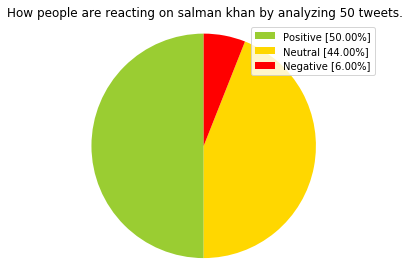

In [233]:
#Visualization


labels=['Positive [' +str(positive)+'%]', 'Neutral [' +str(neutral)+'%]', 'Negative [' +str(negative)+'%]']
sizes=[positive,neutral,negative]
colors=['yellowgreen','gold','red']
patches,texts=plt.pie(sizes, colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("How people are reacting on "+ searchTerm +" by analyzing "+ str(noofsearchTerms)+" tweets.")
plt.axis("equal")
plt.tight_layout()
plt.show();

In [221]:
                        #Heat Map
import googlemaps
import gmplot

gmaps = googlemaps.Client(key='*************-*************')
coordinates={'latitude':[],'longitude':[]}

for count,user_loc in enumerate(df['Location']):
    try:
        location=gmaps.geocode(user_loc)
        for i in location:
            coordinates['latitude'].append(i['geometry']['location']['lat'])
            coordinates['longitude'].append(i['geometry']['location']['lng'])
            
    except:
        pass

    
gmap = gmplot.GoogleMapPlotter(30, 0, 3)

gmap.heatmap(coordinates['latitude'],coordinates['longitude'],radius=20)
gmap.draw("python_heatmap.html")